<a href="https://colab.research.google.com/github/dk-wei/tensorflow-dojo/blob/main/tf_keras_classification_model_wide_deep_regression_%E5%87%BD%E6%95%B0%E5%BC%8FAPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ipython-autotime
%load_ext autotime

time: 1.92 ms (started: 2021-07-23 03:59:06 +00:00)


In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

time: 2.16 s (started: 2021-07-23 03:59:06 +00:00)


In [ ]:
print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.5.0
sys.version_info(major=3, minor=7, micro=11, releaselevel='final', serial=0)
matplotlib 3.2.2
numpy 1.19.5
pandas 1.1.5
sklearn 0.22.2.post1
tensorflow 2.5.0
tensorflow.keras 2.5.0
time: 3.31 ms (started: 2021-07-23 03:59:09 +00:00)


In [ ]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [ ]:
from sklearn.model_selection import train_test_split

x_train_all, x_test, y_train_all, y_test = train_test_split(
    housing.data, housing.target, random_state = 7)

x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_all, y_train_all, random_state = 11)

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)
time: 48.6 ms (started: 2021-07-23 03:59:11 +00:00)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

time: 9.94 ms (started: 2021-07-23 03:59:11 +00:00)


In [ ]:
# 多输出

# 函数式API
input_wide = keras.layers.Input(shape=[5])
input_deep = keras.layers.Input(shape=[6])
hidden1 = keras.layers.Dense(30, activation='relu')(input_deep)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_wide, hidden2])
output = keras.layers.Dense(1)(concat)
output2 = keras.layers.Dense(1)(hidden2)

# 最后需要用Model类固定为一个model
model = keras.models.Model(inputs = [input_wide, input_deep],
                         outputs = [output, output2])

model.summary()

model.compile(loss='mean_squared_error', 
              optimizer='adam'
              )

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           210         input_2[0][0]                    
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
______________________________________________________________________________________________

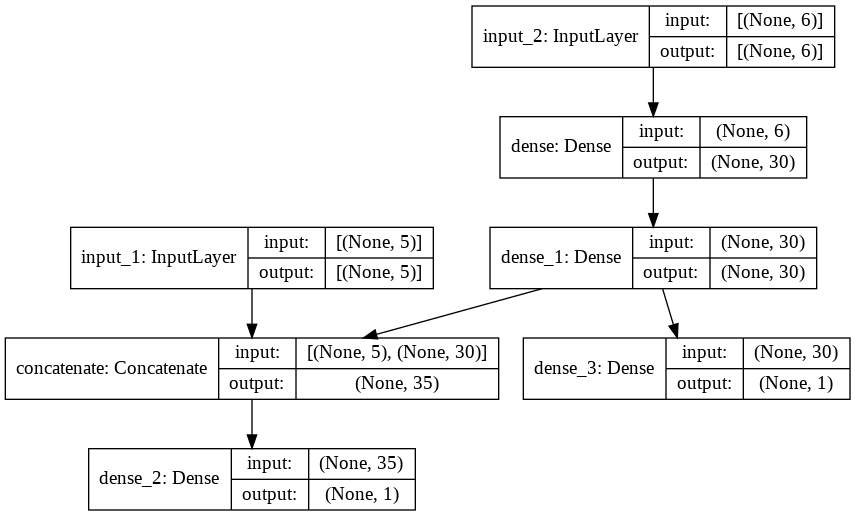

time: 339 ms (started: 2021-07-23 04:00:00 +00:00)


In [ ]:
keras.utils.plot_model(model, 
                       show_shapes=True, 
                       #rankdir="LR"
                       )

In [ ]:
x_train_scaled_wide = x_train_scaled[:, :5]
x_train_scaled_deep = x_train_scaled[:, 2:]
x_valid_scaled_wide = x_valid_scaled[:, :5]
x_valid_scaled_deep = x_valid_scaled[:, 2:]
x_test_scaled_wide = x_test_scaled[:, :5]
x_test_scaled_deep = x_test_scaled[:, 2:]


callbacks = [
    keras.callbacks.EarlyStopping(patience=5, min_delta=1e-2)
]

history = model.fit([x_train_scaled_wide, x_train_scaled_deep], 
                    [y_train, y_train],  # 根据认为的不同，这两个y_train不应该是一样的
                    validation_data=([x_valid_scaled_wide, x_valid_scaled_deep], [y_valid, y_valid]),
                    epochs=100,
                    callbacks=callbacks
                    )

Epoch 1/100
363/363 [==============================] - 5s 4ms/step - loss: 2.8560 - dense_2_loss: 1.3026 - dense_3_loss: 1.5534 - val_loss: 1.3604 - val_dense_2_loss: 0.6149 - val_dense_3_loss: 0.7455
Epoch 2/100
363/363 [==============================] - 1s 4ms/step - loss: 1.0882 - dense_2_loss: 0.4783 - dense_3_loss: 0.6100 - val_loss: 1.0525 - val_dense_2_loss: 0.4537 - val_dense_3_loss: 0.5988
Epoch 3/100
363/363 [==============================] - 1s 4ms/step - loss: 0.9743 - dense_2_loss: 0.4186 - dense_3_loss: 0.5557 - val_loss: 0.9767 - val_dense_2_loss: 0.4226 - val_dense_3_loss: 0.5541
Epoch 4/100
363/363 [==============================] - 1s 3ms/step - loss: 0.9263 - dense_2_loss: 0.4005 - dense_3_loss: 0.5258 - val_loss: 0.9285 - val_dense_2_loss: 0.4058 - val_dense_3_loss: 0.5227
Epoch 5/100
363/363 [==============================] - 1s 4ms/step - loss: 0.8876 - dense_2_loss: 0.3866 - dense_3_loss: 0.5010 - val_loss: 0.8942 - val_dense_2_loss: 0.3933 - val_dense_3_loss: 0.

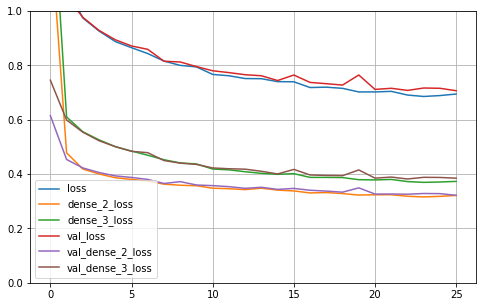

time: 3.71 s (started: 2021-07-23 03:59:55 +00:00)


In [ ]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()
    
plot_learning_curves(history)

In [ ]:
model.evaluate([x_test_scaled_wide, x_test_scaled_deep], [y_test, y_test])

162/162 [==============================] - 0s 2ms/step - loss: 0.7039 - dense_2_loss: 0.3306 - dense_3_loss: 0.3733


[0.7039321064949036, 0.3306354284286499, 0.37329667806625366]

time: 802 ms (started: 2021-07-23 03:59:59 +00:00)
